In [43]:
# cifar-10 dataset으로 이미지 분류 모델 - CNN X
# 총 10개의 레이블과 6만장의 칼라 이미지 (32 * 32)
# airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [44]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('train 샘플 수: ', x_train.shape[0])
print('train 채널 수: ', x_train.shape[3])
print('train 이미지 크기: ', x_train.shape[1], 'X', x_train.shape[2])
print('test 샘플 수: ', x_test.shape[0])
print('test type: ', x_test.dtype)

# print(x_train[0])
# print(y_train[0])

train 샘플 수:  50000
train 채널 수:  3
train 이미지 크기:  32 X 32
test 샘플 수:  10000
test type:  uint8


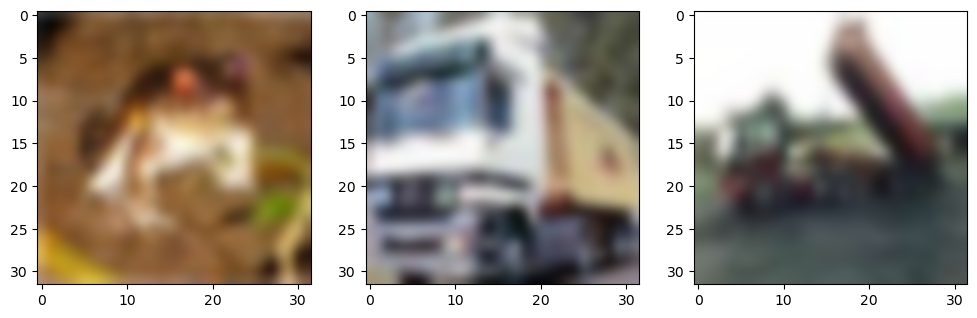

In [ ]:
# 시각화
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(x_train[0], interpolation='bicubic')
plt.subplot(132)
plt.imshow(x_train[1], interpolation='bicubic')
plt.subplot(133)
plt.imshow(x_train[2], interpolation='bicubic')
plt.show()
plt.close()

In [46]:
# 정규화
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# print(x_train[0])

# label(class) 원핫 처리
NUM_CLASSES = 10
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)
# print(y_train[0])

In [47]:
# model (Sequential API)
# model = Sequential([
#     Input(shape=(32, 32, 3)),
#     Flatten(),
#     Dense(units=256, activation='relu'),
#     Dense(units=128, activation='relu'),
#     Dense(units=NUM_CLASSES, activation='softmax')
# ])
# print(model.summary())

# model (Functional API)
input_layer = Input(shape=(32, 32, 3))
x = Flatten()(input_layer)
x = Dense(units=256, activation='relu')(x)
x = Dense(units=128, activation='relu')(x)
output_layer = Dense(units=NUM_CLASSES, activation='softmax')(x)
model = Model(input_layer, output_layer)
print(model.summary())

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 820,874 (3.13 MB)

 Trainable params: 820,874 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

None


In [48]:
# train
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=2)

Epoch 1/20
782/782 - 3s - 4ms/step - accuracy: 0.3184 - loss: 1.8825
Epoch 2/20
782/782 - 2s - 3ms/step - accuracy: 0.3969 - loss: 1.6871
Epoch 3/20
782/782 - 2s - 3ms/step - accuracy: 0.4287 - loss: 1.6005
Epoch 4/20
782/782 - 3s - 3ms/step - accuracy: 0.4504 - loss: 1.5436
Epoch 5/20
782/782 - 2s - 3ms/step - accuracy: 0.4593 - loss: 1.5100
Epoch 6/20
782/782 - 3s - 3ms/step - accuracy: 0.4750 - loss: 1.4759
Epoch 7/20
782/782 - 2s - 3ms/step - accuracy: 0.4829 - loss: 1.4493
Epoch 8/20
782/782 - 2s - 3ms/step - accuracy: 0.4887 - loss: 1.4289
Epoch 9/20
782/782 - 2s - 3ms/step - accuracy: 0.4974 - loss: 1.4043
Epoch 10/20
782/782 - 2s - 3ms/step - accuracy: 0.5051 - loss: 1.3867
Epoch 11/20
782/782 - 2s - 3ms/step - accuracy: 0.5131 - loss: 1.3660
Epoch 12/20
782/782 - 2s - 3ms/step - accuracy: 0.5175 - loss: 1.3515
Epoch 13/20
782/782 - 2s - 3ms/step - accuracy: 0.5214 - loss: 1.3388
Epoch 14/20
782/782 - 2s - 3ms/step - accuracy: 0.5306 - loss: 1.3211
Epoch 15/20
782/782 - 2s - 3m

In [49]:
print('test acc: %.4f' % (model.evaluate(x_test, y_test, verbose=0, batch_size=64)[1]))
print('test loss: %.4f' % (model.evaluate(x_test, y_test, verbose=0, batch_size=64)[0]))

test acc: 0.5056
test loss: 1.4106


In [50]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

In [51]:
# pred
pred = model.predict(x_test[:10])
print(np.argmax(pred, axis=-1)) # [3 8 8 8 4 6 3 6 2 1]
pred_cla = CLASSES[np.argmax(pred, axis=-1)]
actual_cla = CLASSES[np.argmax(y_test[:10], axis=-1)]
print('예측값: ', pred_cla)
print('실제값: ', pred_cla)
print('분류 실패 수: ', (pred_cla != actual_cla).sum())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[3 1 8 0 4 3 3 6 2 1]
예측값:  ['cat' 'automobile' 'ship' 'airplane' 'deer' 'cat' 'cat' 'frog' 'bird'
 'automobile']
실제값:  ['cat' 'automobile' 'ship' 'airplane' 'deer' 'cat' 'cat' 'frog' 'bird'
 'automobile']
분류 실패 수:  5


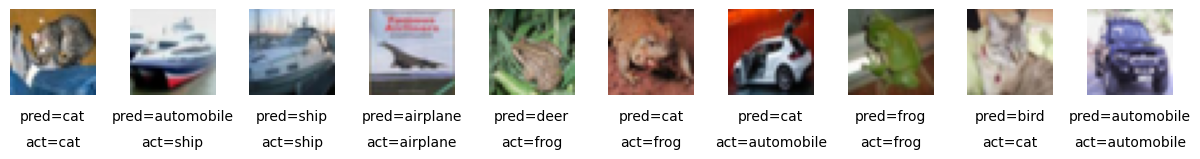

In [52]:
fig = plt.figure(figsize=(15, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(range(len(x_test[:10]))):
    img = x_test[idx]
    ax = fig.add_subplot(1, len(x_test[:10]), i+1)
    ax.axis('off')
    ax.text(0.5, -0.3, 'pred=' + str(pred_cla[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.6, 'act=' + str(actual_cla[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
plt.show()
plt.close()